In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("../data/Medicaid_data.csv")
df.head()

,Utilization Type,State,NDC,Labeler Code,Product Code,Package Size,Year,Quarter,Suppression Used,Product Name,Units Reimbursed,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed
0,FFSU,AK,2143380,2,1433,80,2025,2,False,TRULICITY,216.0,107.0,102976.40,98630.87,4345.53
1,FFSU,AK,2143480,2,1434,80,2025,2,False,TRULICITY,218.0,109.0,104481.92,101806.64,2675.28
2,FFSU,AK,2143611,2,1436,11,2025,2,False,EMGALITY P,21.0,20.0,15227.25,15227.25,0.00
3,FFSU,AK,2144511,2,1445,11,2025,2,False,TALTZ AUTO,33.0,30.0,231532.28,231532.28,0.00
4,FFSU,AK,2145780,2,1457,80,2025,2,False,MOUNJARO,208.0,104.0,108908.80,105953.32,2955.48


In [7]:
df.columns

Index(['Utilization Type', 'State', 'NDC', 'Labeler Code', 'Product Code',
       'Package Size', 'Year', 'Quarter', 'Suppression Used', 'Product Name',
       'Units Reimbursed', 'Number of Prescriptions',
       'Total Amount Reimbursed', 'Medicaid Amount Reimbursed',
       'Non Medicaid Amount Reimbursed'],
      dtype='object')

In [9]:
# objective 1: high cost and low cost drugs
drug_cost = df.groupby('Product Name')['Total Amount Reimbursed'].sum().reset_index()
drug_cost = drug_cost.sort_values(by='Total Amount Reimbursed', ascending=False)

In [11]:
high_cost_drugs = drug_cost.head(10)
high_cost_drugs

,Product Name,Total Amount Reimbursed
4377,HUMIRA PEN,2.253603e+09
9261,TRULICITY,1.989183e+09
4660,INVEGA SUS,1.772232e+09
2610,DUPIXENT S,1.675423e+09
1309,Biktarvy,1.640428e+09
1098,BIKTARVY,1.487752e+09
4896,Jardiance,1.225414e+09
4823,JARDIANCE,1.224935e+09
9837,VRAYLAR (C,1.169762e+09
10323,ZEPBOUND,1.116446e+09


In [13]:
low_cost_drugs = drug_cost[drug_cost['Total Amount Reimbursed']> 0].tail(10)
low_cost_drugs

,Product Name,Total Amount Reimbursed
8060,ROCEPHIN,3.56
7453,PREVDUO 3,3.00
2603,DUONEB (IP,1.50
19,0.9% W/V S,1.29
260,AKOVAZ 50M,1.19
2400,DIFLUCAN,1.00
2731,Diflucan (,1.00
10023,WITCH HAZE,0.84
5313,LDR WITCH,0.84
4887,JUNIOR STR,0.35


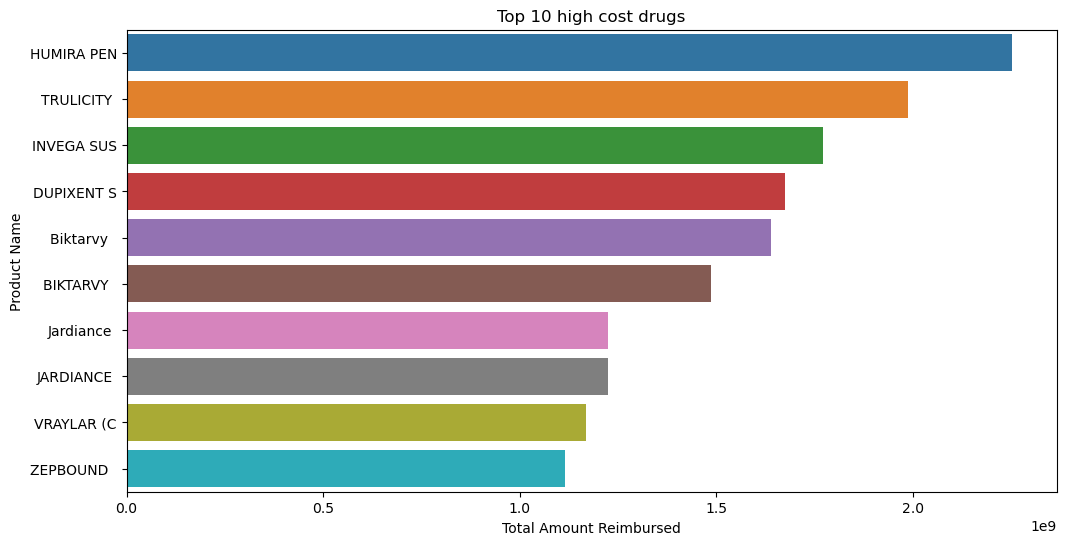

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(data=high_cost_drugs, x="Total Amount Reimbursed", y="Product Name")
plt.title('Top 10 high cost drugs')
plt.xlabel("Total Amount Reimbursed")
plt.ylabel('Product Name')
plt.show()

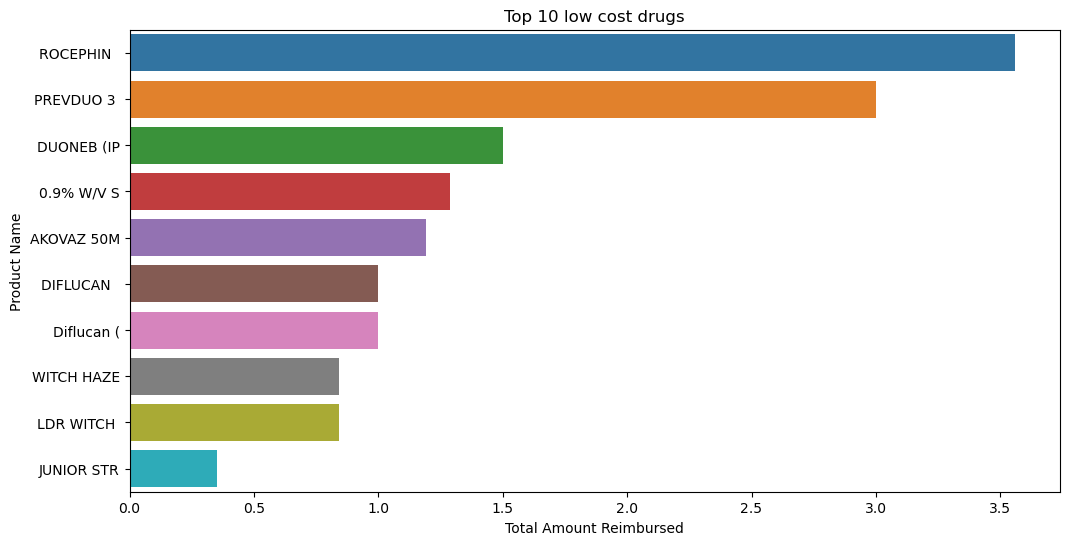

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(data=low_cost_drugs, x="Total Amount Reimbursed", y="Product Name")
plt.title('Top 10 low cost drugs')
plt.xlabel("Total Amount Reimbursed")
plt.ylabel('Product Name')
plt.show()

In [19]:
# objective 2:most popular drugs
drug_popularity = df.groupby('Product Name')['Number of Prescriptions'].sum().reset_index()
drug_popularity = drug_popularity.sort_values(by='Number of Prescriptions', ascending=False)

In [20]:
most_pop_drugs = drug_popularity.head(10)
most_pop_drugs

,Product Name,Number of Prescriptions
440,AMOXICILLI,15719522.0
3629,FLUTICASON,10921057.0
292,ALBUTEROL,10317404.0
642,ATORVASTAT,9680371.0
6850,ONDANSETRO,9198611.0
3863,GABAPENTIN,9054488.0
1565,CETIRIZINE,8347808.0
4514,IBUPROFEN,7765211.0
5890,METFORMIN,7215459.0
8328,SERTRALINE,7103519.0


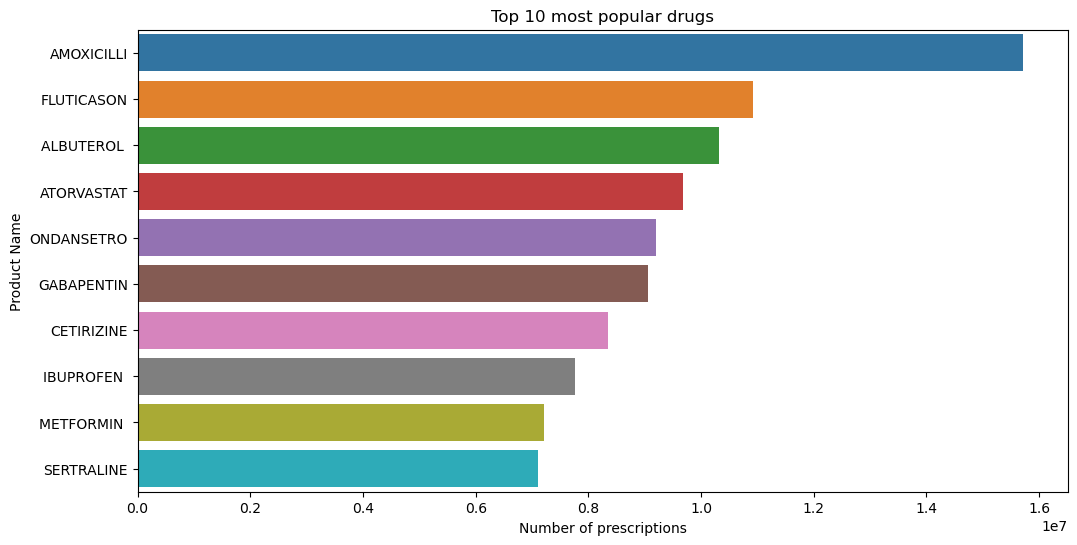

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(data=most_pop_drugs, x="Number of Prescriptions", y="Product Name")
plt.title('Top 10 most popular drugs')
plt.xlabel("Number of prescriptions")
plt.ylabel('Product Name')
plt.show()

In [22]:
state_drug_use = df.groupby('State')["Units Reimbursed"].sum().reset_index().sort_values(by='Units Reimbursed', ascending=False)
state_spending = df.groupby("State")['Total Amount Reimbursed'].sum().reset_index().sort_values(by="Total Amount Reimbursed", ascending=False)

In [23]:
state_drug_use.head(10)

,State,Units Reimbursed
52,XX,2.320929e+10
4,CA,3.211247e+09
34,NY,2.403084e+09
35,OH,1.157968e+09
38,PA,1.060265e+09
44,TX,9.982072e+08
27,NC,8.075003e+08
22,MI,7.758629e+08
14,IL,7.165588e+08
9,FL,7.026974e+08


In [24]:
state_spending.head(10)

,State,Total Amount Reimbursed
52,XX,5.644606e+10
4,CA,8.143485e+09
34,NY,6.078539e+09
38,PA,2.644197e+09
35,OH,2.293810e+09
27,NC,2.265033e+09
22,MI,1.934683e+09
44,TX,1.749445e+09
14,IL,1.652224e+09
9,FL,1.643099e+09
